In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
from pymatreader import read_mat
import IPython
from pathlib import Path
from utilities import savefig
from scipy.interpolate import make_smoothing_spline

In [8]:
NB_NAME = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"]).stem

In [9]:
DATAPATH = os.path.join(
    os.path.abspath(""), "data", "freq_sweep_old_dev_v2"
)

sweep1 = os.path.join(
    DATAPATH,
    "Freq_SNSPD_GaAs_SiO2___RT_scan_TMTE_20250108-161759_CTL_CW_321THz_1p2e+04GHz_0V_0p050uW.mat",
)

data1 = read_mat(sweep1)["Data"]

/home/ali/miniconda3/envs/university/lib/python3.11/site-packages/pymatreader/utils.py:291: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


In [29]:
wl1, counts1 = 2.99792458e+5 / data1["FreqList"], data1["MeasureCounts"]
dark_counts1 = data1["DarkCounts"]
spl = make_smoothing_spline(wl1[::-1], counts1[::-1], lam=20)
spl_lin = np.linspace(917, 950, 50_000)
spl_vals = spl(spl_lin)

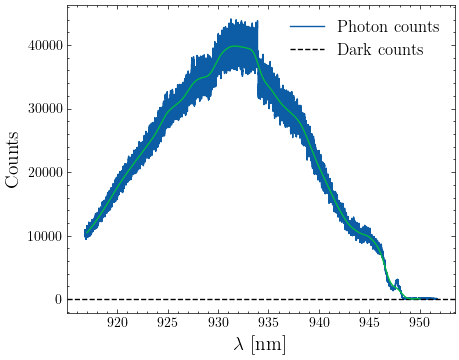

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.set_ylabel("Counts", fontsize=14)
ax.set_xlabel("$\lambda$ [nm]", fontsize=14)
ax.plot(wl1, counts1, label=r"Photon counts")
ax.axhline(dark_counts1, ls="dashed", color="black", label="Dark counts")
ax.legend(frameon=False, fontsize=12)
ax.plot(spl_lin, spl_vals)
# savefig(NB_NAME, "freq_scan", fig)